In [21]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet,LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, SVR
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.cluster import KMeans
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
data = pd.read_csv('OnlineNewsPopularity.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

# Data preprocessing 

In [3]:
data.head()

url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  ...  \
0                   0.815385         4.0              2.0        1.0  ...   
1                   0.791946         3.0              1.0        1.0  ...   
2                   0.663866         3.0              1.0        1.0  ...   
3                   0.665635         9.0              0.0        1.0  ...   
4                   0.540890        19.0             19.0       20.0  ...   

    min_positive_polarity   max_positive_polarity   avg_negative_polarity  \
0                0.100000                     0.7               -0.350000   
1                0.033333                     0.7               -0.118750   
2                0.100000                     1.0               -0.466667   
3                0.136364                     0.8               -0.369697   
4                0.033333                     1.0               -0.220192   

    min_negative_polarity   max_negative_polarity   title_subjectivity  \
0                  -0.600               -0.200000             0.500000   
1                  -0.125               -0.100000             0.000000   
2                  -0.800               -0.133333             0.000000   
3                  -0.600               -0.166667             0.000000   
4                  -0.500               -0.050000             0.454545   

    title_sentiment_polarity   abs_title_subjectivity  \
0                  -0.187500                 0.000000   
1                   0.000000                 0.500000   
2                   0.000000                 0.500000   
3                   0.000000                 0.500000   
4                   0.136364                 0.045455   

    abs_title_sentiment_polarity   shares  
0                       0.187500      593  
1                       0.000000      711  
2                       0.000000     1500  
3                       0.000000     1200  
4                       0.136364      505  

[5 rows x 61 columns]

In [4]:
data.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [5]:
data.describe()

timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
count  39644.000000     39644.000000       39644.000000      39644.000000   
mean     354.530471        10.398749         546.514731          0.548216   
std      214.163767         2.114037         471.107508          3.520708   
min        8.000000         2.000000           0.000000          0.000000   
25%      164.000000         9.000000         246.000000          0.470870   
50%      339.000000        10.000000         409.000000          0.539226   
75%      542.000000        12.000000         716.000000          0.608696   
max      731.000000        23.000000        8474.000000        701.000000   

        n_non_stop_words   n_non_stop_unique_tokens     num_hrefs  \
count       39644.000000               39644.000000  39644.000000   
mean            0.996469                   0.689175     10.883690   
std             5.231231                   3.264816     11.332017   
min             0.000000                   0.000000      0.000000   
25%             1.000000                   0.625739      4.000000   
50%             1.000000                   0.690476      8.000000   
75%             1.000000                   0.754630     14.000000   
max          1042.000000                 650.000000    304.000000   

        num_self_hrefs      num_imgs    num_videos  ...  \
count     39644.000000  39644.000000  39644.000000  ...   
mean          3.293638      4.544143      1.249874  ...   
std           3.855141      8.309434      4.107855  ...   
min           0.000000      0.000000      0.000000  ...   
25%           1.000000      1.000000      0.000000  ...   
50%           3.000000      1.000000      0.000000  ...   
75%           4.000000      4.000000      1.000000  ...   
max         116.000000    128.000000     91.000000  ...   

        min_positive_polarity   max_positive_polarity   avg_negative_polarity  \
count            39644.000000            39644.000000            39644.000000   
mean                 0.095446                0.756728               -0.259524   
std                  0.071315                0.247786                0.127726   
min                  0.000000                0.000000               -1.000000   
25%                  0.050000                0.600000               -0.328383   
50%                  0.100000                0.800000               -0.253333   
75%                  0.100000                1.000000               -0.186905   
max                  1.000000                1.000000                0.000000   

        min_negative_polarity   max_negative_polarity   title_subjectivity  \
count            39644.000000            39644.000000         39644.000000   
mean                -0.521944               -0.107500             0.282353   
std                  0.290290                0.095373             0.324247   
min                 -1.000000               -1.000000             0.000000   
25%                 -0.700000               -0.125000             0.000000   
50%                 -0.500000               -0.100000             0.150000   
75%                 -0.300000               -0.050000             0.500000   
max                  0.000000                0.000000             1.000000   

        title_sentiment_polarity   abs_title_subjectivity  \
count               39644.000000             39644.000000   
mean                    0.071425                 0.341843   
std                     0.265450                 0.188791   
min                    -1.000000                 0.000000   
25%                     0.000000                 0.166667   
50%                     0.000000                 0.500000   
75%                     0.150000                 0.500000   
max                     1.000000                 0.500000   

        abs_title_sentiment_polarity         shares  
count                   39644.000000   39644.000000  
mean                        0.156064    3395.380184  
std              

In [6]:
data.isnull().sum()

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64

In [7]:
# Feature selection: Dropping the URL column and any other unnecessary columns
X = data.drop(['url', ' shares'], axis=1)  # Features
y = data[' shares']  # Target variable

# For classification, you might want to bin the target variable (popularity) into categories
y_class = pd.cut(y, bins=[0, 1400, 2800, np.inf], labels=[0, 1, 2])

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Normalize/Standardize features for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train_class = scaler.fit_transform(X_train_class)
X_test_class = scaler.transform(X_test_class)

# Exploratory Data Analysis- Descriptive Statistcics 

In [8]:
# Step 1: Descriptive Statistics
descriptive_stats = data.describe()

# Display descriptive statistics
print(descriptive_stats)

          timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
count  39644.000000     39644.000000       39644.000000      39644.000000   
mean     354.530471        10.398749         546.514731          0.548216   
std      214.163767         2.114037         471.107508          3.520708   
min        8.000000         2.000000           0.000000          0.000000   
25%      164.000000         9.000000         246.000000          0.470870   
50%      339.000000        10.000000         409.000000          0.539226   
75%      542.000000        12.000000         716.000000          0.608696   
max      731.000000        23.000000        8474.000000        701.000000   

        n_non_stop_words   n_non_stop_unique_tokens     num_hrefs  \
count       39644.000000               39644.000000  39644.000000   
mean            0.996469                   0.689175     10.883690   
std             5.231231                   3.264816     11.332017   
min             0.000000      

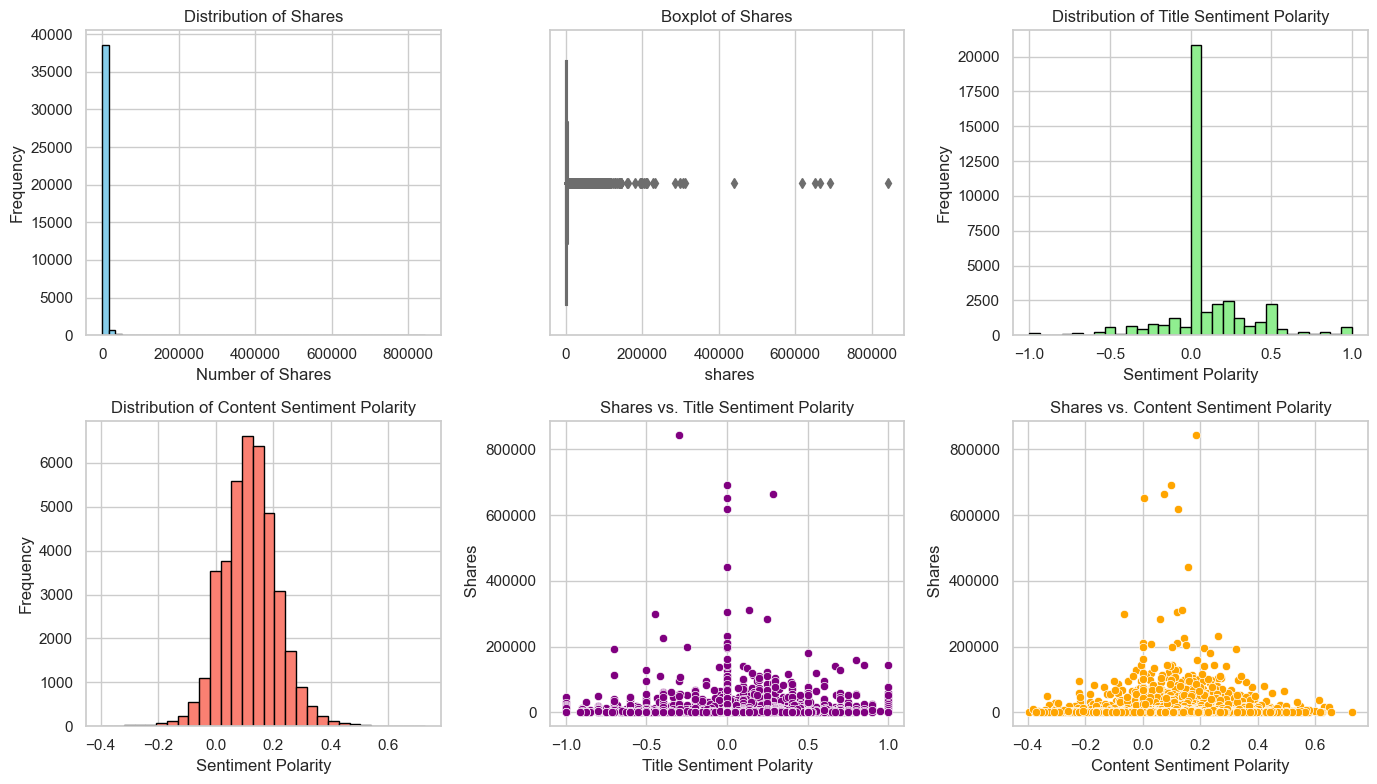

In [9]:
# Step 2: Visualization
# Set the plot style
sns.set(style="whitegrid")

# Create a figure with subplots
plt.figure(figsize=(14, 8))

# Histogram for the distribution of shares (target variable)
plt.subplot(2, 3, 1)
plt.hist(data[' shares'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Shares')
plt.xlabel('Number of Shares')
plt.ylabel('Frequency')

# Box plot for the shares distribution
plt.subplot(2, 3, 2)
sns.boxplot(x=data[' shares'], color='salmon')
plt.title('Boxplot of Shares')

# Histogram for the title sentiment polarity
plt.subplot(2, 3, 3)
plt.hist(data[' title_sentiment_polarity'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Title Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')

# Histogram for the global sentiment polarity
plt.subplot(2, 3, 4)
plt.hist(data[' global_sentiment_polarity'], bins=30, color='salmon', edgecolor='black')
plt.title('Distribution of Content Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')

# Scatter plot for shares vs. title sentiment polarity
plt.subplot(2, 3, 5)
sns.scatterplot(x=data[' title_sentiment_polarity'], y=data[' shares'], color='purple')
plt.title('Shares vs. Title Sentiment Polarity')
plt.xlabel('Title Sentiment Polarity')
plt.ylabel(' Shares')

# Scatter plot for shares vs. global sentiment polarity
plt.subplot(2, 3, 6)
sns.scatterplot(x=data[' global_sentiment_polarity'], y=data[' shares'], color='orange')
plt.title('Shares vs. Content Sentiment Polarity')
plt.xlabel('Content Sentiment Polarity')
plt.ylabel(' Shares')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()

# Correlation Analysis 

In [10]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Print the correlation matrix
print(correlation_matrix)

/var/folders/ky/rkmn3lp91zv9m55_y5_hm2600000gn/T/ipykernel_41197/528089156.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


                                 timedelta   n_tokens_title  \
 timedelta                        1.000000        -0.240320   
 n_tokens_title                  -0.240320         1.000000   
 n_tokens_content                -0.062867         0.018160   
 n_unique_tokens                  0.002866        -0.005318   
 n_non_stop_words                 0.000089        -0.004754   
 n_non_stop_unique_tokens         0.003805        -0.005420   
 num_hrefs                       -0.000832        -0.053496   
 num_self_hrefs                   0.064530        -0.014856   
 num_imgs                        -0.027636        -0.008858   
 num_videos                       0.000936         0.051460   
 average_token_length             0.130465        -0.071403   
 num_keywords                     0.046884        -0.006077   
 data_channel_is_lifestyle        0.054492        -0.070815   
 data_channel_is_entertainment   -0.049109         0.132791   
 data_channel_is_bus              0.055788        -0.02

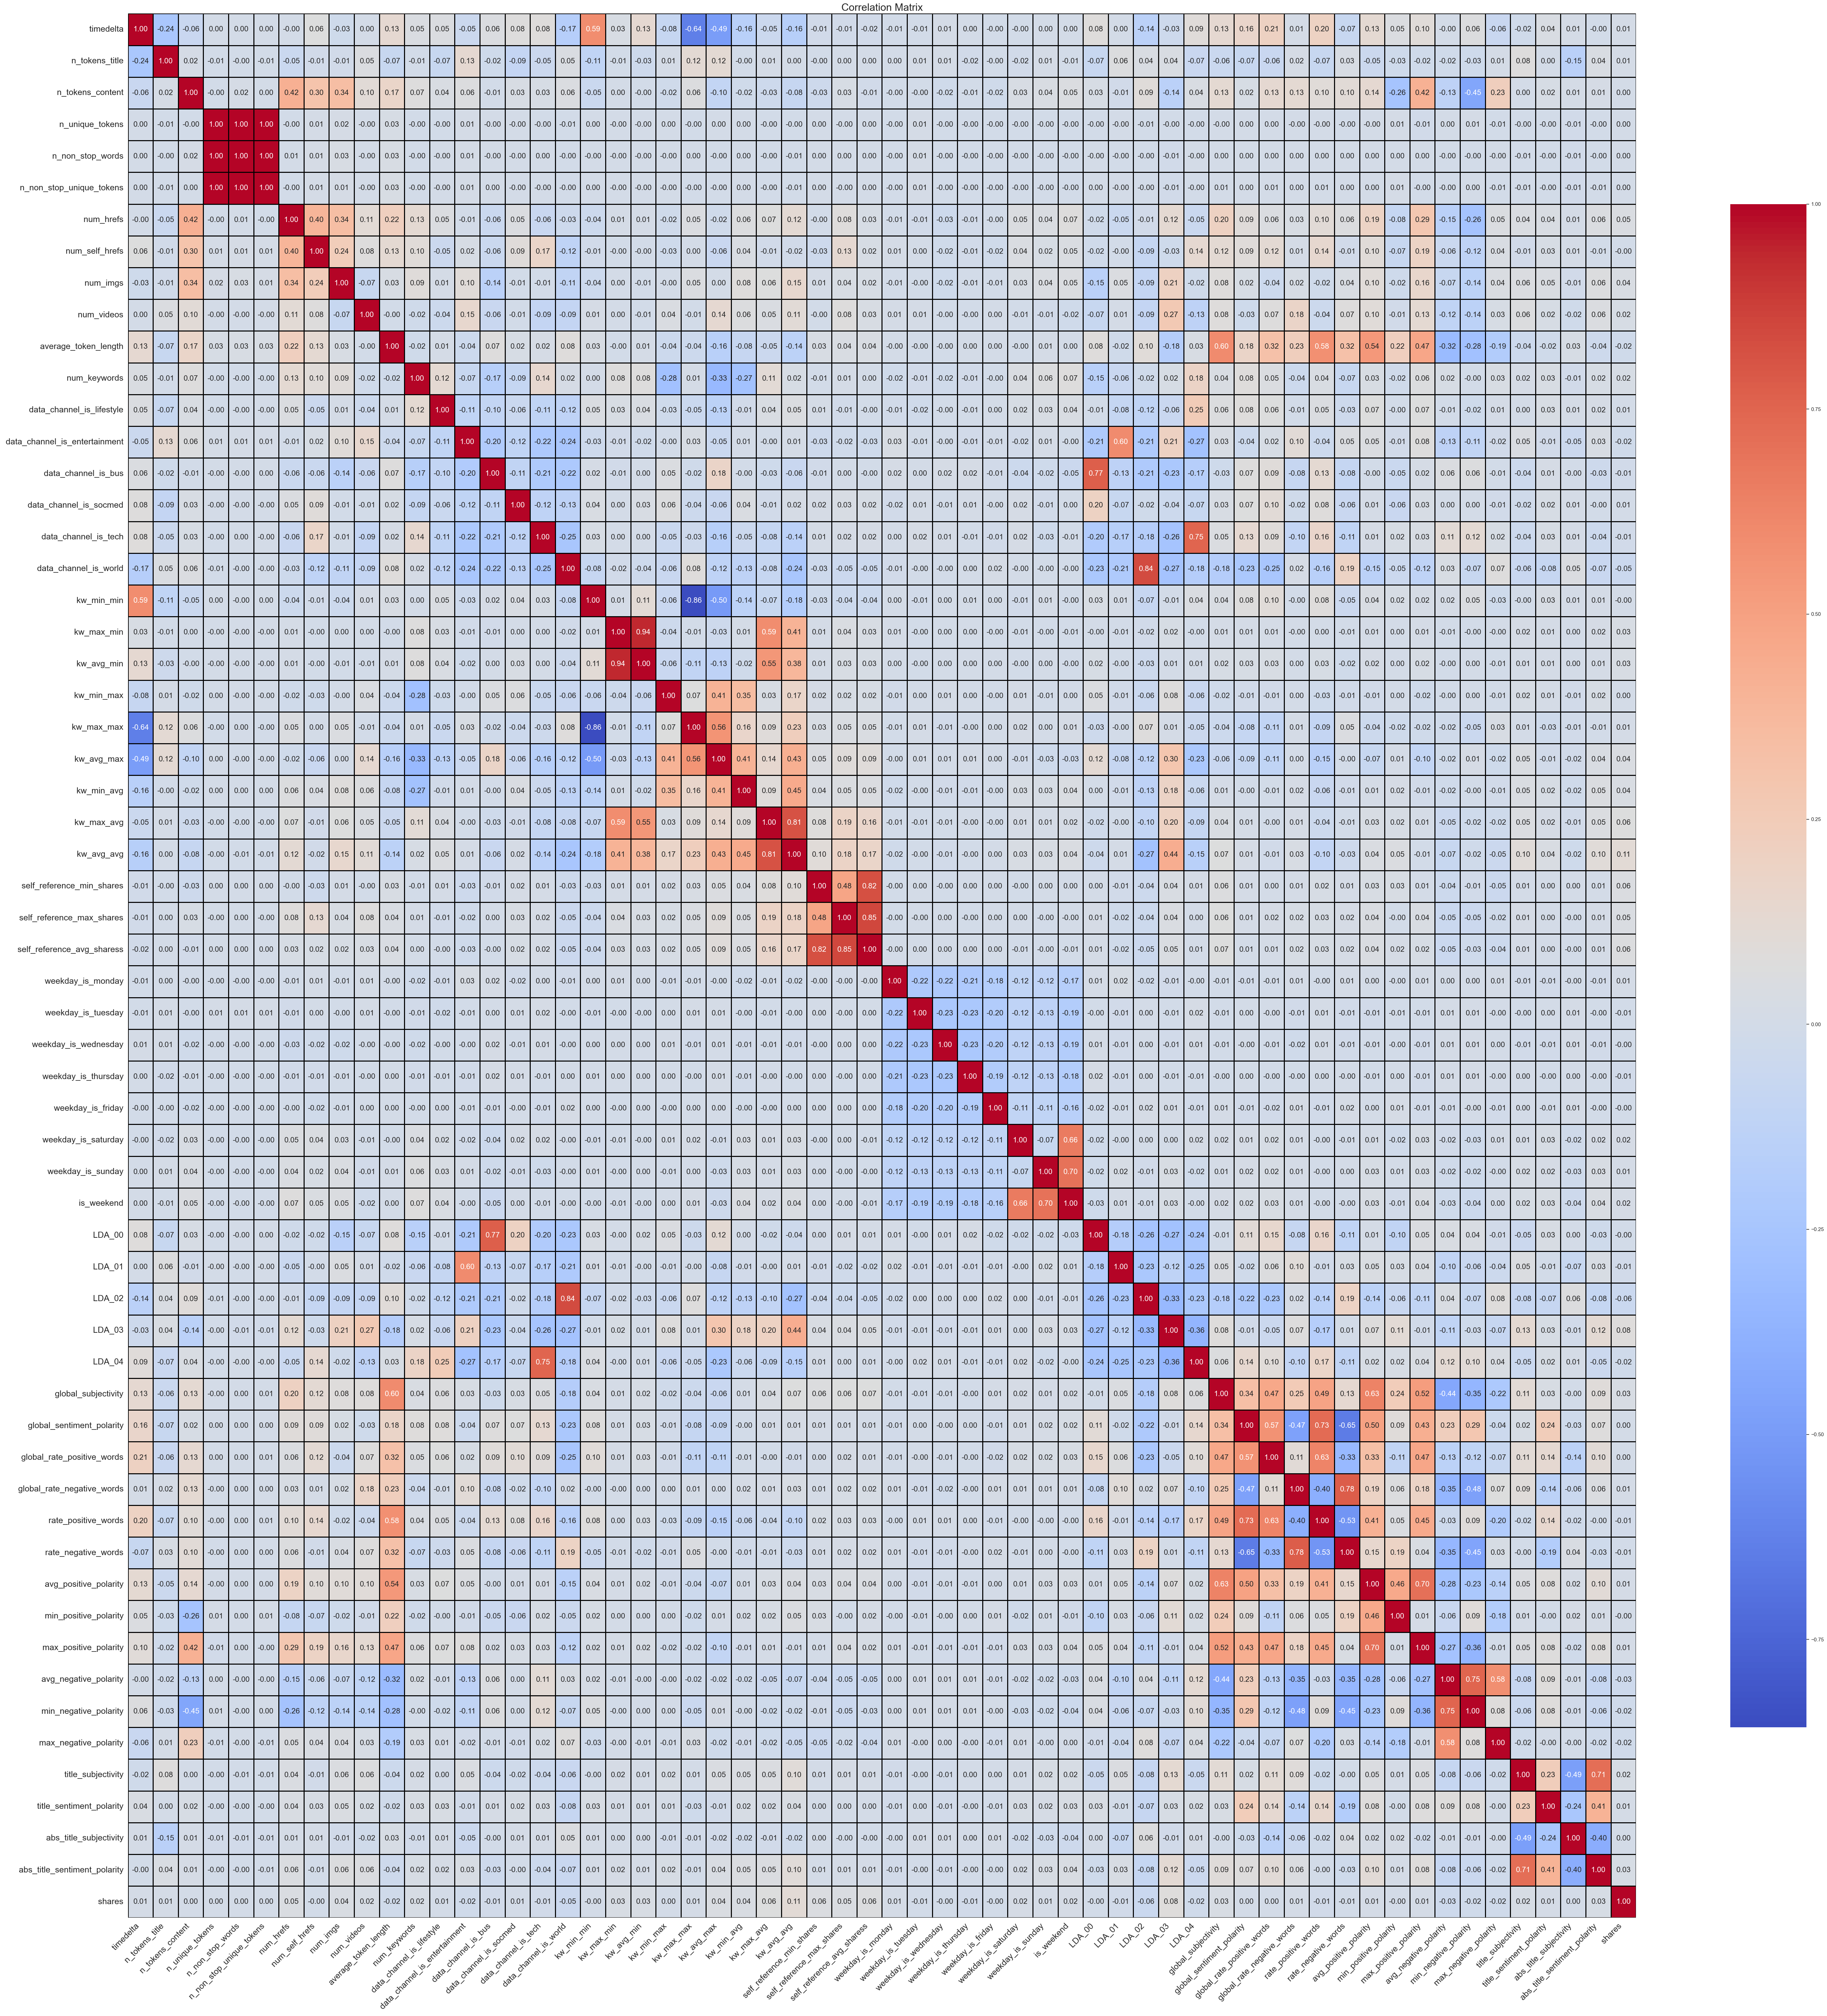

In [11]:
# Plot the heatmap for correlation with clearer visibility
plt.figure(figsize= (60, 60))  # Increase the figure size for more space

# Create a heatmap with clear annotations and high contrast color
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            linewidths=1, linecolor='black', annot_kws={"size": 16}, cbar_kws={'shrink': 0.8})

# Set the title with a larger font size
plt.title('Correlation Matrix', fontsize=22)

# Adjust the x and y axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=18)  # Rotate x-axis labels for clarity
plt.yticks(rotation=0, fontsize=18)  # Keep y-axis labels horizontal for clarity

# Adjust layout to avoid overlapping elements
plt.tight_layout()

# Show the plot
plt.show()

# Text Feature Engineering

# Extract Titles from URLs

In [12]:
import re

# Extract title from URL
def extract_title_from_url(url):
    # Split URL by slashes and hyphens, remove non-alphanumeric
    return ' '.join(re.sub(r'[^a-zA-Z0-9]', ' ', part) for part in url.split('/'))

# Apply the function to the 'url' column
data['text'] = data['url'].apply(extract_title_from_url)

# Print the resulting DataFrame
print(data)

                                                     url   timedelta  \
0      http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1      http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2      http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3      http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4       http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   
...                                                  ...         ...   
39639  http://mashable.com/2014/12/27/samsung-app-aut...         8.0   
39640  http://mashable.com/2014/12/27/seth-rogen-jame...         8.0   
39641  http://mashable.com/2014/12/27/son-pays-off-mo...         8.0   
39642     http://mashable.com/2014/12/27/ukraine-blasts/         8.0   
39643  http://mashable.com/2014/12/27/youtube-channel...         8.0   

        n_tokens_title   n_tokens_content   n_unique_tokens  \
0                 12.0              219.0          0.663594   
1        

# Text Preprocessing

In [13]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import nltk

# Ensure NLTK stopwords and tokenizer are downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Preprocessing function
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing
data['cleaned_text'] = data['text'].apply(preprocess_text)

# Display preprocessed text
print(data[['text', 'cleaned_text']])

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nikhitakalburgikar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nikhitakalburgikar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                    text  \
0      http   mashable com 2013 01 07 amazon instant ...   
1      http   mashable com 2013 01 07 ap samsung spon...   
2      http   mashable com 2013 01 07 apple 40 billio...   
3      http   mashable com 2013 01 07 astronaut notre...   
4       http   mashable com 2013 01 07 att u verse apps    
...                                                  ...   
39639  http   mashable com 2014 12 27 samsung app aut...   
39640  http   mashable com 2014 12 27 seth rogen jame...   
39641  http   mashable com 2014 12 27 son pays off mo...   
39642     http   mashable com 2014 12 27 ukraine blasts    
39643  http   mashable com 2014 12 27 youtube channel...   

                                            cleaned_text  
0      http mashable com 2013 01 07 amazon instant vi...  
1      http mashable com 2013 01 07 ap samsung sponso...  
2      http mashable com 2013 01 07 apple 40 billion ...  
3      http mashable com 2013 01 07 astrona

# Text Feature Extraction

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=500)  # Limit to top 500 features
tfidf_features = tfidf_vectorizer.fit_transform(data['cleaned_text'])

# Convert sparse matrix to DataFrame for inspection
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Combine with Existing Features

In [15]:
# Combine text-based TF-IDF features with other numeric features
combined_features = pd.concat(
    [data.drop(columns=['url', 'text', 'cleaned_text']), pd.DataFrame(tfidf_features.toarray())],
    axis=1
)

# Bag of Words (BoW) using CountVectorizer:

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
bow_features = vectorizer.fit_transform(data['cleaned_text'])

# Display feature names and matrix
print("Feature Names:", vectorizer.get_feature_names_out())
print("BoW Matrix:\n", bow_features.toarray())

Feature Names: ['007' '01' '012414' ... 'zynga' 'zz' 'zzzquil']
BoW Matrix:
 [[0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# TF-IDF (Term Frequency-Inverse Document Frequency):

In [17]:
# tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(data['cleaned_text'])

# Display feature names and matrix
print("TF-IDF Feature Names:", tfidf_vectorizer.get_feature_names_out())
print("TF-IDF Matrix:\n", tfidf_features.toarray())

TF-IDF Feature Names: ['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '100' '11' '12' '13'
 '14' '15' '16' '17' '18' '19' '20' '2013' '2014' '2015' '21' '22' '23'
 '24' '25' '26' '27' '28' '29' '30' '31' '3d' '5s' 'acquires' 'ad' 'ads'
 'advertising' 'advice' 'air' 'airbnb' 'airlines' 'airport' 'al' 'album'
 'amazon' 'america' 'american' 'android' 'animals' 'anniversary' 'app'
 'apple' 'apps' 'arrested' 'art' 'att' 'attack' 'australia' 'awards'
 'baby' 'back' 'bad' 'ban' 'beats' 'beer' 'best' 'beyonce' 'bieber' 'big'
 'bill' 'billion' 'bitcoin' 'black' 'blackberry' 'book' 'books' 'boston'
 'bowl' 'box' 'brands' 'brandspeak' 'breaking' 'brief' 'business' 'buy'
 'california' 'camera' 'cancer' 'cant' 'car' 'cards' 'case' 'cat' 'cats'
 'celebrity' 'ceo' 'ces' 'challenge' 'change' 'chart' 'chat' 'china'
 'chinese' 'chris' 'christmas' 'chrome' 'city' 'climate' 'cloud' 'college'
 'com' 'comic' 'comments' 'con' 'cook' 'costumes' 'court' 'cover' 'crash'
 'cup' 'cyrus' 'dance' 'dancing' 'data

# Advanced Feature Engineering

# N-grams: Extract bi-grams, tri-grams, etc.:

In [18]:
ngram_vectorizer = CountVectorizer(ngram_range=(1, 2))  # Unigrams and bigrams
ngram_features = ngram_vectorizer.fit_transform(data['cleaned_text'])

print("N-gram Feature Names:", ngram_vectorizer.get_feature_names_out())
print("N-gram Matrix:\n", ngram_features.toarray())

N-gram Feature Names: ['007' '01' '01 01' ... 'zz ward' 'zzzquil' 'zzzquil mlk']
N-gram Matrix:
 [[0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# Custom Features:

# Word Count:

In [19]:
data['word_count'] = data['cleaned_text'].apply(lambda x: len(x.split()))
print(data[['cleaned_text', 'word_count']])

                                            cleaned_text  word_count
0      http mashable com 2013 01 07 amazon instant vi...          10
1      http mashable com 2013 01 07 ap samsung sponso...          10
2      http mashable com 2013 01 07 apple 40 billion ...          11
3      http mashable com 2013 01 07 astronaut notre d...          10
4          http mashable com 2013 01 07 att u verse apps          10
...                                                  ...         ...
39639    http mashable com 2014 12 27 samsung app autism           9
39640  http mashable com 2014 12 27 seth rogen james ...          13
39641     http mashable com 2014 12 27 son pays mortgage           9
39642        http mashable com 2014 12 27 ukraine blasts           8
39643  http mashable com 2014 12 27 youtube channels ...           9

[39644 rows x 2 columns]


# Average Word Length:

In [20]:
data['avg_word_length'] = data['cleaned_text'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()))
print(data[['cleaned_text', 'avg_word_length']])

                                            cleaned_text  avg_word_length
0      http mashable com 2013 01 07 amazon instant vi...         4.800000
1      http mashable com 2013 01 07 ap samsung sponso...         4.700000
2      http mashable com 2013 01 07 apple 40 billion ...         4.454545
3      http mashable com 2013 01 07 astronaut notre d...         4.400000
4          http mashable com 2013 01 07 att u verse apps         3.600000
...                                                  ...              ...
39639    http mashable com 2014 12 27 samsung app autism         4.333333
39640  http mashable com 2014 12 27 seth rogen james ...         4.692308
39641     http mashable com 2014 12 27 son pays mortgage         4.222222
39642        http mashable com 2014 12 27 ukraine blasts         4.500000
39643  http mashable com 2014 12 27 youtube channels ...         4.666667

[39644 rows x 2 columns]


# NLP METHODOLOGIES

Text Preprocessing - Tokenization, Stop-word removal, stemming, Lemmatization for headlines and keywords

In [22]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Load the dataset
csv_file_path = 'OnlineNewsPopularity.csv'
df = pd.read_csv(csv_file_path)

# Clean up column names by stripping leading/trailing spaces
df.columns = df.columns.str.strip()

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Tokenization function
def tokenize_text(text):
    return re.findall(r'\b\w+\b', str(text).lower())

# Stop-word removal function
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english')).union(ENGLISH_STOP_WORDS)
    return [word for word in tokens if word not in stop_words]

# Stemming function
def stem_tokens(tokens):
    return [stemmer.stem(word) for word in tokens]

# Lemmatization function
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

# Apply text preprocessing to the title and content columns
def preprocess_text_column(column_name):
    df[column_name + '_tokens'] = df[column_name].apply(tokenize_text)
    df[column_name + '_no_stopwords'] = df[column_name + '_tokens'].apply(remove_stopwords)
    df[column_name + '_stemmed'] = df[column_name + '_no_stopwords'].apply(stem_tokens)
    df[column_name + '_lemmatized'] = df[column_name + '_no_stopwords'].apply(lemmatize_tokens)

# Apply preprocessing to 'n_tokens_title' (headlines) and 'n_tokens_content' (keywords/content)
preprocess_text_column('n_tokens_title')
preprocess_text_column('n_tokens_content')

# Check the first few rows to verify the changes
df[['n_tokens_title', 'n_tokens_title_tokens', 'n_tokens_title_no_stopwords', 
    'n_tokens_title_stemmed', 'n_tokens_title_lemmatized', 
    'n_tokens_content', 'n_tokens_content_tokens', 'n_tokens_content_no_stopwords', 
    'n_tokens_content_stemmed', 'n_tokens_content_lemmatized']].head()

n_tokens_title n_tokens_title_tokens n_tokens_title_no_stopwords  \
0            12.0               [12, 0]                     [12, 0]   
1             9.0                [9, 0]                      [9, 0]   
2             9.0                [9, 0]                      [9, 0]   
3             9.0                [9, 0]                      [9, 0]   
4            13.0               [13, 0]                     [13, 0]   

  n_tokens_title_stemmed n_tokens_title_lemmatized  n_tokens_content  \
0                [12, 0]                   [12, 0]             219.0   
1                 [9, 0]                    [9, 0]             255.0   
2                 [9, 0]                    [9, 0]             211.0   
3                 [9, 0]                    [9, 0]             531.0   
4                [13, 0]                   [13, 0]            1072.0   

  n_tokens_content_tokens n_tokens_content_no_stopwords  \
0                [219, 0]                      [219, 0]   
1                [255, 0]                      [255, 0]   
2                [211, 0]                      [211, 0]   
3                [531, 0]                      [531, 0]   
4               [1072, 0]                     [1072, 0]   

  n_tokens_content_stemmed n_tokens_content_lemmatized  
0                 [219, 0]                    [219, 0]  
1                 [255, 0]                    [255, 0]  
2                 [211, 0]                    [211, 0]  
3                 [531, 0]                    [531, 0]  
4                [1072, 0]                   [1072, 0]

In [23]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


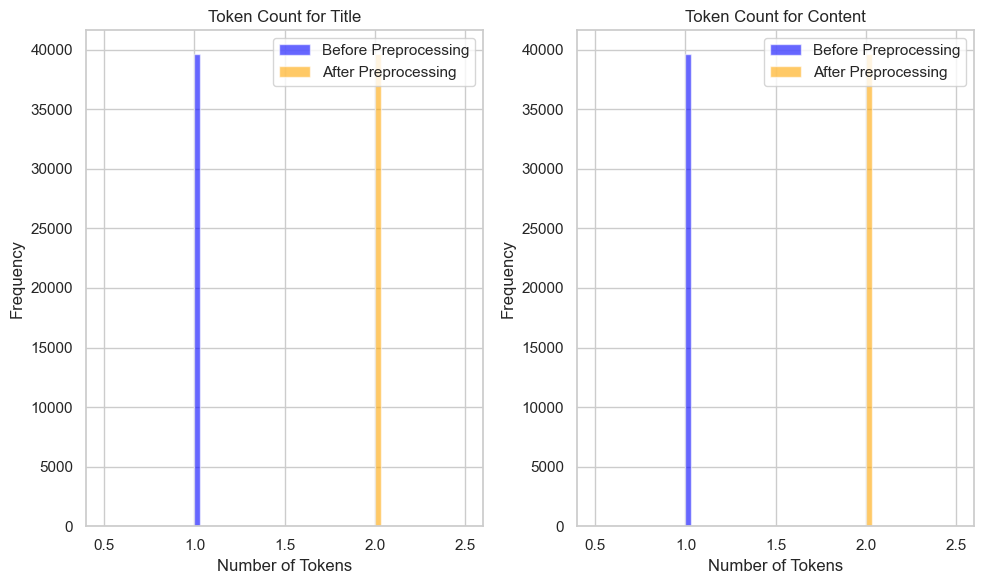

In [24]:
import matplotlib.pyplot as plt

# Count the number of tokens for each step in preprocessing
df['n_tokens_title_before'] = df['n_tokens_title'].apply(lambda x: len(str(x).split()))
df['n_tokens_content_before'] = df['n_tokens_content'].apply(lambda x: len(str(x).split()))

df['n_tokens_title_after'] = df['n_tokens_title_no_stopwords'].apply(lambda x: len(x))
df['n_tokens_content_after'] = df['n_tokens_content_no_stopwords'].apply(lambda x: len(x))

# Plot token count before and after preprocessing for title and content
plt.figure(figsize=(10, 6))

# Plot for title
plt.subplot(1, 2, 1)
plt.hist(df['n_tokens_title_before'], bins=30, alpha=0.6, color='blue', label='Before Preprocessing')
plt.hist(df['n_tokens_title_after'], bins=30, alpha=0.6, color='orange', label='After Preprocessing')
plt.title('Token Count for Title')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.legend()

# Plot for content
plt.subplot(1, 2, 2)
plt.hist(df['n_tokens_content_before'], bins=30, alpha=0.6, color='blue', label='Before Preprocessing')
plt.hist(df['n_tokens_content_after'], bins=30, alpha=0.6, color='orange', label='After Preprocessing')
plt.title('Token Count for Content')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

# Named Entity Recognition (NER)

In [25]:
import nltk
from nltk import ne_chunk, pos_tag, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

# Function to extract named entities using NLTK's Named Entity Chunking
def extract_entities(text):
    words = word_tokenize(str(text))
    pos_tags = pos_tag(words)
    named_entities = ne_chunk(pos_tags)
    entities = []
    for chunk in named_entities:
        if isinstance(chunk, tuple):  # Ignore non-chunks (tokens)
            continue
        entities.append(" ".join(c[0] for c in chunk))  # Join entity parts
    return entities

# Apply Named Entity Recognition (NER) to title and content columns
df['title_entities'] = df['n_tokens_title'].apply(extract_entities)
df['content_entities'] = df['n_tokens_content'].apply(extract_entities)

# Check the result for NER in both title and content
print(df[['n_tokens_title', 'title_entities', 'n_tokens_content', 'content_entities']].head())

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nikhitakalburgikar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/nikhitakalburgikar/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/nikhitakalburgikar/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/nikhitakalburgikar/nltk_data...
[nltk_data]   Package words is already up-to-date!


   n_tokens_title title_entities  n_tokens_content content_entities
0            12.0             []             219.0               []
1             9.0             []             255.0               []
2             9.0             []             211.0               []
3             9.0             []             531.0               []
4            13.0             []            1072.0               []


# Text Clustering

In [26]:
# Check the columns in the DataFrame
print(df.columns)

# Strip any leading/trailing spaces in column names
df.columns = df.columns.str.strip()

# Check if 'n_tokens_title' and 'n_tokens_content' columns exist
if 'n_tokens_title' in df.columns and 'n_tokens_content' in df.columns:
    # Combine the title and content into a new column 'text_combined'
    df['text_combined'] = df['n_tokens_title'].astype(str) + " " + df['n_tokens_content'].astype(str)
else:
    print("Required columns ('n_tokens_title', 'n_tokens_content') are not available.")

# Ensure that 'text_combined' was created
print(df[['n_tokens_title', 'n_tokens_content', 'text_combined']].head())

# Now convert the combined text into a TF-IDF matrix
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(df['text_combined'])

# Apply Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

n_clusters = 5  # Number of clusters
agg_clustering = AgglomerativeClustering

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

# Sentimental Analysis 

In [27]:
# Clean the column names by stripping leading/trailing spaces
data.columns = data.columns.str.strip()

# Now we can access the columns without issues
print(data.columns)

# Function to clean and preprocess text (if needed)
def clean_text(text):
    # Convert text to lowercase and remove punctuation
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    return text

# Apply text cleaning to title and content columns
# We'll try accessing the correct columns now
data['cleaned_title'] = data['n_tokens_title'].apply(str)  # Convert to string (since it's a token count)
data['cleaned_content'] = data['n_tokens_content'].apply(str)  # Convert to string

# Sentiment Analysis using TextBlob (if needed)
from textblob import TextBlob

def get_sentiment(text):
    # Create a TextBlob object
    blob = TextBlob(text)
    # Sentiment polarity: ranges from -1 (negative) to 1 (positive)
    sentiment = blob.sentiment.polarity
    return sentiment

# Apply sentiment analysis to title and content columns
data['title_sentiment'] = data['cleaned_title'].apply(get_sentiment)
data['content_sentiment'] = data['cleaned_content'].apply(get_sentiment)

# Print the resulting dataframe with sentiment scores
print(data[['title_sentiment', 'content_sentiment', 'shares']].head())

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

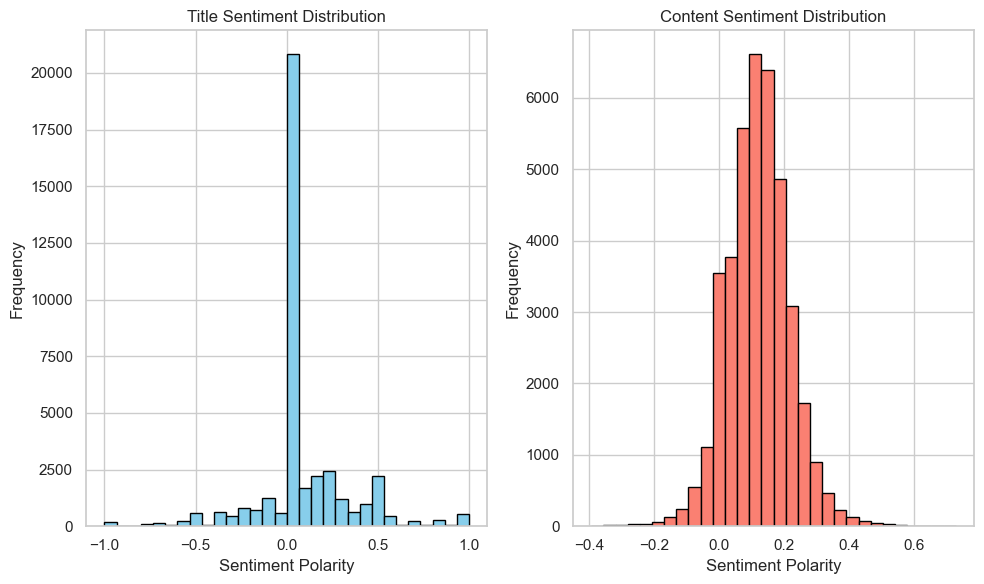

In [28]:
import matplotlib.pyplot as plt

# Plot the sentiment analysis results for title and content using existing sentiment columns
plt.figure(figsize=(10, 6))

# Plot histogram for title sentiment polarity
plt.subplot(1, 2, 1)
plt.hist(data['title_sentiment_polarity'], bins=30, color='skyblue', edgecolor='black')
plt.title('Title Sentiment Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')

# Plot histogram for content sentiment polarity
plt.subplot(1, 2, 2)
plt.hist(data['global_sentiment_polarity'], bins=30, color='salmon', edgecolor='black')
plt.title('Content Sentiment Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

### CLASSIFICATION MODELS 

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [30]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
file_path = "OnlineNewsPopularity.csv"
data = pd.read_csv(file_path)

# Clean column names
data.columns = data.columns.str.strip()

# Create binary target variable based on median shares
median_shares = data['shares'].median()
data['popularity'] = (data['shares'] >= median_shares).astype(int)

# Drop unnecessary columns (e.g., 'url', 'shares') and set features and target
features = data.drop(columns=['url', 'shares', 'popularity'])
target = data['popularity']

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Train Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_train = nb_model.predict(X_train)
y_pred_test = nb_model.predict(X_test)

# Calculate accuracy and generate classification report
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
classification_rep = classification_report(y_test, y_pred_test)

# Display results
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")
print("Classification Report:")
print(classification_rep)

Training Accuracy: 0.51
Testing Accuracy: 0.52
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.94      0.65      3774
           1       0.72      0.14      0.23      4155

    accuracy                           0.52      7929
   macro avg       0.61      0.54      0.44      7929
weighted avg       0.61      0.52      0.43      7929



In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score


# Train K-Nearest Neighbors classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_train = knn_model.predict(X_train)
y_pred_test = knn_model.predict(X_test)

# Calculate accuracy and generate classification report
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
classification_rep = classification_report(y_test, y_pred_test)

# Display results
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")
print("Classification Report:")
print(classification_rep)

Training Accuracy: 0.74
Testing Accuracy: 0.61
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.60      0.60      3774
           1       0.63      0.61      0.62      4155

    accuracy                           0.61      7929
   macro avg       0.61      0.61      0.61      7929
weighted avg       0.61      0.61      0.61      7929



In [32]:
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Train XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)

# Calculate accuracy and generate classification report
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
classification_rep = classification_report(y_test, y_pred_test)

# Display results
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")
print("Classification Report:")
print(classification_rep)

/Users/nikhitakalburgikar/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [09:43:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Accuracy: 0.87
Testing Accuracy: 0.66
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.62      0.64      3774
           1       0.67      0.70      0.69      4155

    accuracy                           0.66      7929
   macro avg       0.66      0.66      0.66      7929
weighted avg       0.66      0.66      0.66      7929



Naive Bayes Accuracy: 0.5202421490730231

Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           0       0.50      0.94      0.65      3774
           1       0.72      0.14      0.23      4155

    accuracy                           0.52      7929
   macro avg       0.61      0.54      0.44      7929
weighted avg       0.61      0.52      0.43      7929

K-Nearest Neighbors Accuracy: 0.6100390969857485

Classification Report for K-Nearest Neighbors:
               precision    recall  f1-score   support

           0       0.59      0.60      0.60      3774
           1       0.63      0.61      0.62      4155

    accuracy                           0.61      7929
   macro avg       0.61      0.61      0.61      7929
weighted avg       0.61      0.61      0.61      7929



/Users/nikhitakalburgikar/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [09:43:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.6625047294740825

Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.65      0.62      0.64      3774
           1       0.67      0.70      0.69      4155

    accuracy                           0.66      7929
   macro avg       0.66      0.66      0.66      7929
weighted avg       0.66      0.66      0.66      7929



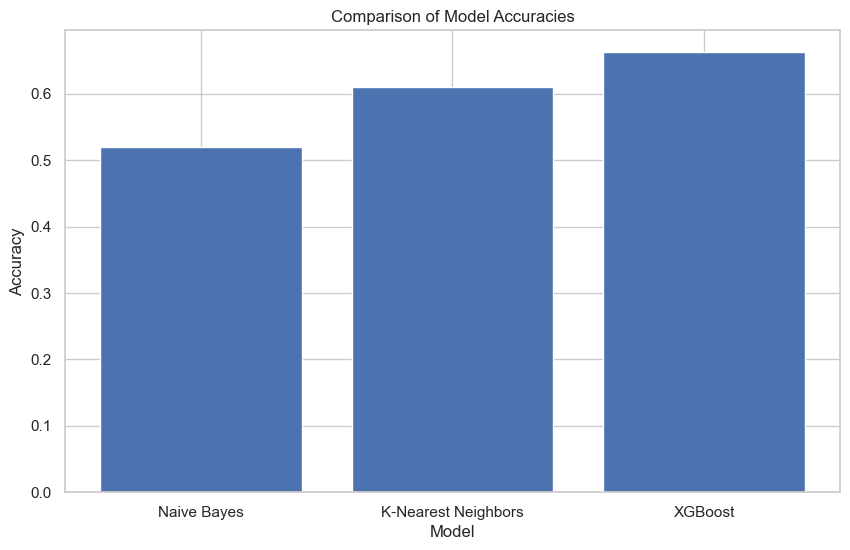

In [33]:
# Plotting the accuracies vs models 
models = {
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Dictionary to store accuracy scores
accuracy_scores = {}

# Train, predict, and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracy_scores[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy}")
    print(f"\nClassification Report for {model_name}:\n", classification_report(y_test, predictions))

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values())
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.show()

# Regression Models

In [34]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Linear Regression Model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predictions on training and test sets
y_train_pred = linear_reg.predict(X_train)
y_test_pred = linear_reg.predict(X_test)

# Calculate MSE and RMSE for both train and test
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(f'Linear Regression RMSE (Train): {train_rmse}')
print(f'Linear Regression RMSE (Test): {test_rmse}')

Linear Regression RMSE (Train): 0.46647541721677965
Linear Regression RMSE (Test): 0.46863959194923044


In [35]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import numpy as np

# Lasso Regression Model
lasso_reg = Lasso(alpha=0.1)  # Adjust alpha as needed
lasso_reg.fit(X_train, y_train)

# Predictions on training and test sets
y_train_pred_lasso = lasso_reg.predict(X_train)
y_test_pred_lasso = lasso_reg.predict(X_test)

# Calculate MSE and RMSE for both train and test
train_mse_lasso = mean_squared_error(y_train, y_train_pred_lasso)
test_mse_lasso = mean_squared_error(y_test, y_test_pred_lasso)

train_rmse_lasso = np.sqrt(train_mse_lasso)
test_rmse_lasso = np.sqrt(test_mse_lasso)

print(f'Lasso Regression RMSE (Train): {train_rmse_lasso}')
print(f'Lasso Regression RMSE (Test): {test_rmse_lasso}')

Lasso Regression RMSE (Train): 0.49870286222893073
Lasso Regression RMSE (Test): 0.4995657778398344


In [36]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

# Ridge Regression Model
ridge_reg = Ridge(alpha=0.1)  # Adjust alpha as needed
ridge_reg.fit(X_train, y_train)

# Predictions on training and test sets
y_train_pred_ridge = ridge_reg.predict(X_train)
y_test_pred_ridge = ridge_reg.predict(X_test)

# Calculate MSE and RMSE for both train and test
train_mse_ridge = mean_squared_error(y_train, y_train_pred_ridge)
test_mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)

train_rmse_ridge = np.sqrt(train_mse_ridge)
test_rmse_ridge = np.sqrt(test_mse_ridge)

print(f'Ridge Regression RMSE (Train): {train_rmse_ridge}')
print(f'Ridge Regression RMSE (Test): {test_rmse_ridge}')

Ridge Regression RMSE (Train): 0.46645251190045356
Ridge Regression RMSE (Test): 0.46854788837964945


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Load dataset
file_path = 'OnlineNewsPopularity.csv'  # Replace with your dataset file path
data = pd.read_csv(file_path)

# Step 1: Define features (X) and target variable (y)
X_class = data.drop(columns=[' shares'])  # Features for classification
y_class = data[' shares']                # Target variable (continuous)

# Convert y_class to binary labels (popular = 1, not popular = 0)
y_class = (y_class >= y_class.median()).astype(int)

# Step 2: Remove non-numeric columns
X_class = X_class.drop(columns=['url'])  # Remove columns with text data

# Step 3: Ensure features are numeric (encode categorical features if necessary)
X_class = pd.get_dummies(X_class, drop_first=True)

# Step 4: Scale the features
scaler = StandardScaler()
X_class_scaled = scaler.fit_transform(X_class)

# Step 5: Split data into training and testing sets
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class_scaled, y_class, test_size=0.3, random_state=42
)

# Step 6: Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)  # max_iter set for convergence
log_reg.fit(X_train_class, y_train_class)

# Step 7: Predictions on training and testing sets
y_train_pred_class = log_reg.predict(X_train_class)
y_test_pred_class = log_reg.predict(X_test_class)

# Step 8: Calculate accuracy for both train and test sets
train_accuracy = accuracy_score(y_train_class, y_train_pred_class)
test_accuracy = accuracy_score(y_test_class, y_test_pred_class)

# Step 9: Display results
print(f'Logistic Regression Accuracy (Train): {train_accuracy:.2f}')
print(f'Logistic Regression Accuracy (Test): {test_accuracy:.2f}')
print("\nClassification Report (Test Set):")
print(classification_report(y_test_class, y_test_pred_class))

Logistic Regression Accuracy (Train): 0.66
Logistic Regression Accuracy (Test): 0.65

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.64      0.60      0.62      5591
           1       0.66      0.70      0.68      6303

    accuracy                           0.65     11894
   macro avg       0.65      0.65      0.65     11894
weighted avg       0.65      0.65      0.65     11894



In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_class, y_train_class)

# Predictions on training and test sets
y_train_pred_rf = rf_clf.predict(X_train_class)
y_test_pred_rf = rf_clf.predict(X_test_class)

# Calculate accuracy for training and test sets
train_accuracy_rf = accuracy_score(y_train_class, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test_class, y_test_pred_rf)

# Generate classification report for test set
classification_rep_rf = classification_report(y_test_class, y_test_pred_rf)

# Print results
print(f'Random Forest Accuracy (Train): {train_accuracy_rf:.2f}')
print(f'Random Forest Accuracy (Test): {test_accuracy_rf:.2f}')
print("\nClassification Report (Test Set):")
print(classification_rep_rf)

Random Forest Accuracy (Train): 1.00
Random Forest Accuracy (Test): 0.66

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.65      0.60      0.63      5591
           1       0.67      0.72      0.69      6303

    accuracy                           0.66     11894
   macro avg       0.66      0.66      0.66     11894
weighted avg       0.66      0.66      0.66     11894



In [39]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_clf.fit(X_train_class, y_train_class)

# Predictions on training and test sets
y_train_pred_gb = gb_clf.predict(X_train_class)
y_test_pred_gb = gb_clf.predict(X_test_class)

# Calculate accuracy for training and test sets
train_accuracy_gb = accuracy_score(y_train_class, y_train_pred_gb)
test_accuracy_gb = accuracy_score(y_test_class, y_test_pred_gb)

# Generate classification report for the test set
classification_rep_gb = classification_report(y_test_class, y_test_pred_gb)

# Print results
print(f'Gradient Boosting Accuracy (Train): {train_accuracy_gb:.2f}')
print(f'Gradient Boosting Accuracy (Test): {test_accuracy_gb:.2f}')
print("\nClassification Report (Test Set):")
print(classification_rep_gb)

Gradient Boosting Accuracy (Train): 0.69
Gradient Boosting Accuracy (Test): 0.67

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.66      0.59      0.63      5591
           1       0.67      0.73      0.70      6303

    accuracy                           0.67     11894
   macro avg       0.66      0.66      0.66     11894
weighted avg       0.66      0.67      0.66     11894



In [40]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Support Vector Classifier
svc = SVC(kernel='rbf', C=1.0)  # Adjust kernel and C as needed
svc.fit(X_train_class, y_train_class)

# Predictions on training and test sets
y_train_pred_svc = svc.predict(X_train_class)
y_test_pred_svc = svc.predict(X_test_class)

# Calculate accuracy for train and test sets
train_accuracy_svc = accuracy_score(y_train_class, y_train_pred_svc)
test_accuracy_svc = accuracy_score(y_test_class, y_test_pred_svc)

# Generate classification report for the test set
classification_rep_svc = classification_report(y_test_class, y_test_pred_svc)

# Print results
print(f'Support Vector Classifier Accuracy (Train): {train_accuracy_svc:.2f}')
print(f'Support Vector Classifier Accuracy (Test): {test_accuracy_svc:.2f}')
print("\nClassification Report (Test Set):")
print(classification_rep_svc)

Support Vector Classifier Accuracy (Train): 0.71
Support Vector Classifier Accuracy (Test): 0.65

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.65      0.59      0.62      5591
           1       0.66      0.71      0.69      6303

    accuracy                           0.65     11894
   macro avg       0.65      0.65      0.65     11894
weighted avg       0.65      0.65      0.65     11894



In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_class, y_train_class)

# Predictions on training and test sets
y_train_pred_rf_clf = rf_clf.predict(X_train_class)
y_test_pred_rf_clf = rf_clf.predict(X_test_class)

# Calculate accuracy for training and test sets
train_accuracy_rf_clf = accuracy_score(y_train_class, y_train_pred_rf_clf)
test_accuracy_rf_clf = accuracy_score(y_test_class, y_test_pred_rf_clf)

# Generate classification reports
train_classification_report = classification_report(y_train_class, y_train_pred_rf_clf)
test_classification_report = classification_report(y_test_class, y_test_pred_rf_clf)

# Print results
print(f'Random Forest Classifier Accuracy (Train): {train_accuracy_rf_clf:.2f}')
print(f'Random Forest Classifier Accuracy (Test): {test_accuracy_rf_clf:.2f}')
print("\nClassification Report (Train Set):")
print(train_classification_report)
print("\nClassification Report (Test Set):")
print(test_classification_report)

Random Forest Classifier Accuracy (Train): 1.00
Random Forest Classifier Accuracy (Test): 0.66

Classification Report (Train Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12899
           1       1.00      1.00      1.00     14851

    accuracy                           1.00     27750
   macro avg       1.00      1.00      1.00     27750
weighted avg       1.00      1.00      1.00     27750


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.65      0.60      0.63      5591
           1       0.67      0.72      0.69      6303

    accuracy                           0.66     11894
   macro avg       0.66      0.66      0.66     11894
weighted avg       0.66      0.66      0.66     11894



In [42]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# SVM Classifier
svc = SVC(kernel='rbf', C=1.0)  # kernel='rbf' for Radial Basis Function kernel
svc.fit(X_train_class, y_train_class)

# Predictions on training and test sets
y_train_pred_svc = svc.predict(X_train_class)
y_test_pred_svc = svc.predict(X_test_class)

# Calculate accuracy for training and test sets
train_accuracy_svc = accuracy_score(y_train_class, y_train_pred_svc)
test_accuracy_svc = accuracy_score(y_test_class, y_test_pred_svc)

# Generate classification reports
train_classification_report = classification_report(y_train_class, y_train_pred_svc)
test_classification_report = classification_report(y_test_class, y_test_pred_svc)

# Print results
print(f'SVM Classifier Accuracy (Train): {train_accuracy_svc:.2f}')
print(f'SVM Classifier Accuracy (Test): {test_accuracy_svc:.2f}')
print("\nClassification Report (Train Set):")
print(train_classification_report)
print("\nClassification Report (Test Set):")
print(test_classification_report)

SVM Classifier Accuracy (Train): 0.71
SVM Classifier Accuracy (Test): 0.65

Classification Report (Train Set):
              precision    recall  f1-score   support

           0       0.70      0.65      0.68     12899
           1       0.72      0.76      0.74     14851

    accuracy                           0.71     27750
   macro avg       0.71      0.71      0.71     27750
weighted avg       0.71      0.71      0.71     27750


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.65      0.59      0.62      5591
           1       0.66      0.71      0.69      6303

    accuracy                           0.65     11894
   macro avg       0.65      0.65      0.65     11894
weighted avg       0.65      0.65      0.65     11894



In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_class, y_train_class)

# Predictions on training and test sets
y_train_pred_dt = dt_clf.predict(X_train_class)
y_test_pred_dt = dt_clf.predict(X_test_class)

# Calculate accuracy for training and test sets
train_accuracy_dt = accuracy_score(y_train_class, y_train_pred_dt)
test_accuracy_dt = accuracy_score(y_test_class, y_test_pred_dt)

# Generate classification reports
train_classification_report = classification_report(y_train_class, y_train_pred_dt)
test_classification_report = classification_report(y_test_class, y_test_pred_dt)

# Print results
print(f'Decision Tree Classifier Accuracy (Train): {train_accuracy_dt:.2f}')
print(f'Decision Tree Classifier Accuracy (Test): {test_accuracy_dt:.2f}')
print("\nClassification Report (Train Set):")
print(train_classification_report)
print("\nClassification Report (Test Set):")
print(test_classification_report)

Decision Tree Classifier Accuracy (Train): 1.00
Decision Tree Classifier Accuracy (Test): 0.59

Classification Report (Train Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12899
           1       1.00      1.00      1.00     14851

    accuracy                           1.00     27750
   macro avg       1.00      1.00      1.00     27750
weighted avg       1.00      1.00      1.00     27750


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.57      0.57      0.57      5591
           1       0.62      0.62      0.62      6303

    accuracy                           0.59     11894
   macro avg       0.59      0.59      0.59     11894
weighted avg       0.59      0.59      0.59     11894



In [44]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# AdaBoost Classifier
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_clf.fit(X_train_class, y_train_class)

# Predictions on training and test sets
y_train_pred_ada = ada_clf.predict(X_train_class)
y_test_pred_ada = ada_clf.predict(X_test_class)

# Calculate accuracy for training and test sets
train_accuracy_ada = accuracy_score(y_train_class, y_train_pred_ada)
test_accuracy_ada = accuracy_score(y_test_class, y_test_pred_ada)

# Generate classification reports
train_classification_report = classification_report(y_train_class, y_train_pred_ada)
test_classification_report = classification_report(y_test_class, y_test_pred_ada)

# Print results
print(f'AdaBoost Classifier Accuracy (Train): {train_accuracy_ada:.2f}')
print(f'AdaBoost Classifier Accuracy (Test): {test_accuracy_ada:.2f}')
print("\nClassification Report (Train Set):")
print(train_classification_report)
print("\nClassification Report (Test Set):")
print(test_classification_report)

/Users/nikhitakalburgikar/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Classifier Accuracy (Train): 0.68
AdaBoost Classifier Accuracy (Test): 0.67

Classification Report (Train Set):
              precision    recall  f1-score   support

           0       0.67      0.63      0.65     12899
           1       0.69      0.73      0.71     14851

    accuracy                           0.68     27750
   macro avg       0.68      0.68      0.68     27750
weighted avg       0.68      0.68      0.68     27750


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.66      0.61      0.63      5591
           1       0.68      0.72      0.70      6303

    accuracy                           0.67     11894
   macro avg       0.67      0.66      0.66     11894
weighted avg       0.67      0.67      0.67     11894



Linear Regression: RMSE = 12997.91


/Users/nikhitakalburgikar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.583e+12, tolerance: 3.310e+08
  model = cd_fast.enet_coordinate_descent(


Lasso: RMSE = 12995.95
Ridge: RMSE = 12997.41
Random Forest: RMSE = 13158.67
Gradient Boosting: RMSE = 12955.34
SVR: RMSE = 13278.05
ElasticNet: RMSE = 12996.47


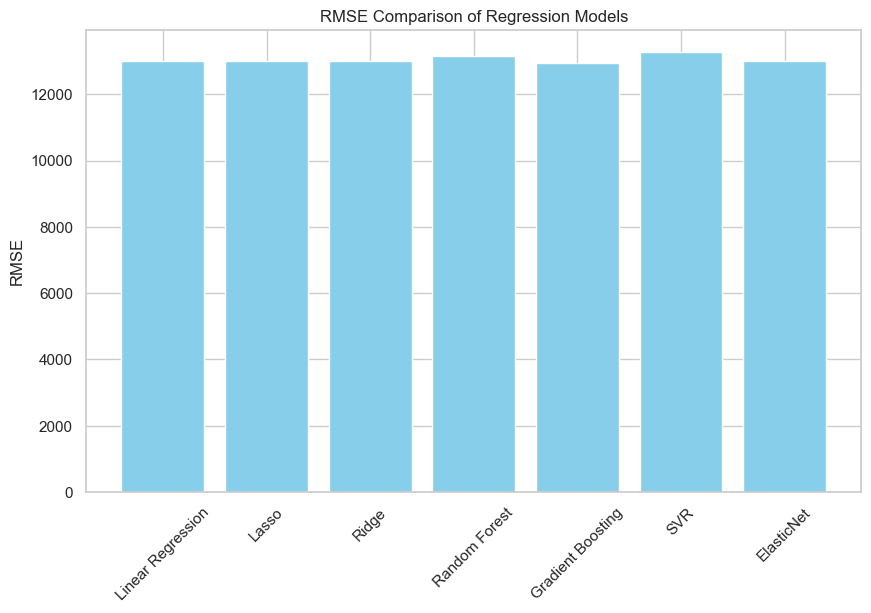

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = 'OnlineNewsPopularity.csv'  # Replace with your dataset file path
data = pd.read_csv(file_path)

# Step 2: Clean the dataset
# Drop non-numeric or irrelevant columns (e.g., URLs)
X = data.drop(columns=['url', ' shares'])  # Adjust this list based on your dataset
y = data[' shares']

# Ensure all features are numeric (convert categorical features if necessary)
X = pd.get_dummies(X, drop_first=True)

# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVR": SVR(),
    "ElasticNet": ElasticNet(),
}

# Step 5: Compute RMSE for each model
rmses_reg = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmses_reg.append(rmse)
    print(f"{name}: RMSE = {rmse:.2f}")

# Step 6: Plot RMSE Comparison
models_reg = list(models.keys())
plt.figure(figsize=(10, 6))
plt.bar(models_reg, rmses_reg, color="skyblue")
plt.title('RMSE Comparison of Regression Models')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.show()

# Bert

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from transformers import DataCollatorWithPadding
from datasets import Dataset
import torch
from torch.utils.data import Dataset
from torch import nn
from transformers import BertModel
from torch.optim import AdamW
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score
from tqdm import tqdm
from sklearn.metrics import classification_report

In [47]:
#  preprocess the dataset
file_path = 'OnlineNewsPopularity.csv'  
data = pd.read_csv(file_path)

# Display the first few rows 
print(data.head())

# Check for null values
print(data.isnull().sum())

# Define popularity labels
# Here, articles with shares > median are labeled as 'Popular' (1), else 'Not Popular' (0)
median_shares = data['shares'].median()
data['Popularity'] = data['shares'].apply(lambda x: 1 if x > median_shares else 0)

# Combine text features if needed
# Assuming 'Headline' is the primary text feature. 
data['Text'] = data['Headline']  

# Drop rows with missing values in critical columns
data = data.dropna(subset=['Text', 'Popularity'])

# Split the dataset into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(
    data['Text'], data['Popularity'], test_size=0.2, random_state=42
)

# Display data distribution
print("Training examples:", len(train_texts))
print("Validation examples:", len(val_texts))

                                                 url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  ...  \
0                   0.815385         4.0     

KeyError: 'shares'

In [ ]:
import torch
from torch.utils.data import Dataset
from transformers import BertTokenizer
import pandas as pd

# Load dataset
file_path = 'OnlineNewsPopularity.csv'
data = pd.read_csv(file_path)

# Convert target variable to binary classification (e.g., popular or not)
median_shares = data[' shares'].median()
data['label'] = (data[' shares'] >= median_shares).astype(int)

# Define custom dataset
class TextClassificationDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        """
        Initialize the dataset with texts, labels, and tokenizer.
        
        Args:
        - texts (list of str): Input text samples.
        - labels (list of int): Corresponding labels for the text samples.
        - tokenizer: Hugging Face tokenizer to preprocess text.
        - max_length (int): Maximum token length for BERT inputs.
        """
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        """Return the total number of samples."""
        return len(self.texts)

    def __getitem__(self, idx):
        """
        Retrieve a single data point as input for BERT.
        
        Args:
        - idx (int): Index of the data point to retrieve.
        
        Returns:
        - A dictionary containing tokenized text and label.
        """
        text = self.texts[idx]
        label = self.labels[idx]
        
        # Tokenize the text
        encoding = self.tokenizer(
            text,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        
        return {
            'input_ids': encoding['input_ids'].squeeze(0),  # Remove batch dimension
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'label': torch.tensor(label, dtype=torch.long)
        }

# Extract URLs as text and labels
texts = data['url'].tolist()
labels = data['label'].tolist()

# Initialize tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Split into training and validation datasets
train_size = int(0.8 * len(texts))
val_size = len(texts) - train_size

train_texts, val_texts = texts[:train_size], texts[train_size:]
train_labels, val_labels = labels[:train_size], labels[train_size:]

train_dataset = TextClassificationDataset(train_texts, train_labels, tokenizer)
val_dataset = TextClassificationDataset(val_texts, val_labels, tokenizer)

# Test dataset functionality
print("Sample input IDs:", train_dataset[0]['input_ids'])
print("Sample attention mask:", train_dataset[0]['attention_mask'])
print("Sample label:", train_dataset[0]['label'])

In [ ]:
# Building BERT classifier 
class BertClassifier(nn.Module):
    def __init__(self, bert_model_name='bert-base-uncased', num_classes=2, dropout_prob=0.3):
        """
        Custom BERT Classifier for text classification tasks.
        
        Args:
        - bert_model_name (str): Name of the pre-trained BERT model to use.
        - num_classes (int): Number of output classes.
        - dropout_prob (float): Dropout probability for regularization.
        """
        super(BertClassifier, self).__init__()
        
        # Load pre-trained BERT model
        self.bert = BertModel.from_pretrained(bert_model_name)
        
        # Dropout layer for regularization
        self.dropout = nn.Dropout(dropout_prob)
        
        # Fully connected layer for classification
        self.classifier = nn.Linear(self.bert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask):
        """
        Forward pass through the BERT classifier.
        
        Args:
        - input_ids (torch.Tensor): Tokenized input IDs.
        - attention_mask (torch.Tensor): Attention mask for input IDs.
        
        Returns:
        - logits (torch.Tensor): Raw prediction scores.
        """
        # Pass inputs through BERT
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        
        # Extract [CLS] token embeddings
        cls_output = outputs.last_hidden_state[:, 0, :]

In [ ]:
# Defining train function 
def train(model, train_dataset, val_dataset, tokenizer, epochs=3, batch_size=16, learning_rate=5e-5, device='cuda'):
    """
    Train the BERT classifier.
    
    Args:
    - model: The BERT-based classifier model.
    - train_dataset: Dataset object for training data.
    - val_dataset: Dataset object for validation data.
    - tokenizer: Tokenizer used to process text data.
    - epochs: Number of training epochs.
    - batch_size: Batch size for training and validation.
    - learning_rate: Learning rate for the optimizer.
    - device: Device to train on ('cuda' or 'cpu').
    
    Returns:
    - model: Trained model.
    """
    # Move the model to the specified device
    model = model.to(device)

    # Data loaders for training and validation datasets
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)

In [ ]:
# Building evaluation method 

def evaluate(model, val_loader, device='cuda'):
    """
    Evaluate the model on the validation set.
    
    Args:
    - model: The trained BERT classifier model.
    - val_loader: DataLoader for the validation dataset.
    - device: Device to perform evaluation on ('cuda' or 'cpu').
    
    Returns:
    - report: Classification report with metrics like precision, recall, and f1-score.
    """
    # Set model to evaluation mode
    model.eval()

    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            # Forward pass
            outputs = model(input_ids, attention_mask)
            logits = outputs
            
            # Get predictions (argmax on logits)
            preds = torch.argmax(logits, dim=1)

            # Collect all predictions and labels for evaluation
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Generate classification report
    report = classification_report(all_labels, all_preds, target_names=['Not Popular', 'Popular'])
    
    return report